In [1]:
# Start a jupyter notebook from an envoironment with asetup already run
# if jupyter is not installed, use:
# > pip install jupyter --user
# > ~/.local/bin/jupyter-notebook --port=8889 --NotebookApp.port_retries=0 --no-browser --NotebookApp.token='atlas'&


# import uproot
import numpy as np
import ROOT
import itertools
from array import array
ROOT.gROOT.SetStyle('ATLAS')
import time
import os
from IPython.display import Image, display

def draw_note(x, y, text='Internal', size=30, font=63):
    l = ROOT.TLatex()
    l.SetNDC()
    l.SetTextColor(1)
    l.SetTextFont(font)
    l.SetTextSize(size);
    l.DrawLatex(x, y, text)

def atlas_label(x, y, text=None, color=1):
    draw_note(x, y, r"#bf{#it{ATLAS}} " + text)

FONT_SIZE = 30

if(not ROOT.xAOD.Init().isSuccess()): print("Failed xAOD.Init()")

Welcome to JupyROOT 6.20/06


In [13]:
f_master = ROOT.TFile(f'/data/newhouse/LRT/batch/testing/compare_22/HNL/AOD.root')
f_private = ROOT.TFile(f'/data/newhouse/LRT/batch/testing/compare_21/HNL/AOD.root')

t_master = ROOT.xAOD.MakeTransientTree(f_master, "CollectionTree")
t_private = ROOT.xAOD.MakeTransientTree(f_private, "CollectionTree")

xAOD::TEvent::readFrom    INFO    Was expecting a metadata tree with size 1, instead of 20.
xAOD::TEvent::readFrom    INFO    File most probably produced by hadd...
xAOD::MakeTransientTree   INFO    Created transient tree "CollectionTree" in ROOT's common memory
xAOD::TEvent::readFrom    INFO    Was expecting a metadata tree with size 1, instead of 20.
xAOD::TEvent::readFrom    INFO    File most probably produced by hadd...
xAOD::MakeTransientTree   INFO    Created transient tree "CollectionTree" in ROOT's common memory


In [14]:
nentries = 100


h_InDetTrackParticles_private = ROOT.TH1F("h_InDetTrackParticles_private","h_InDetTrackParticles_private",100,-350,350); 
for i in range(nentries):
    t_private.GetEntry(i)
    if (i%100==0): print('event', i)
    for j in range(len(t_private.InDetTrackParticles)):
        if t_private.InDetTrackParticles.at(j).patternRecoInfo().test(49):
            h_InDetTrackParticles_private.Fill(t_private.InDetTrackParticles.at(j).d0())
h_InDetTrackParticles_private.Draw()
         

event 0


In [15]:

h_InDetTrackParticles_master = ROOT.TH1F("h_InDetTrackParticles_master","h_InDetTrackParticles_master",100,-350,350); 
for i in range(nentries):
    t_master.GetEntry(i)
    if (i%100==0): print('event', i)
    for j in range(len(t_master.InDetTrackParticles)):
        if t_master.InDetTrackParticles.at(j).patternRecoInfo().test(49):
            h_InDetTrackParticles_master.Fill(t_master.InDetTrackParticles.at(j).d0())
h_InDetTrackParticles_master.Draw("same")




event 0


TCanvas::Constructor      WARNING Deleting canvas with same name: c
TH1F::Sumw2               WARNING Sum of squares of weights structure already created
TH1F::Sumw2               WARNING Sum of squares of weights structure already created


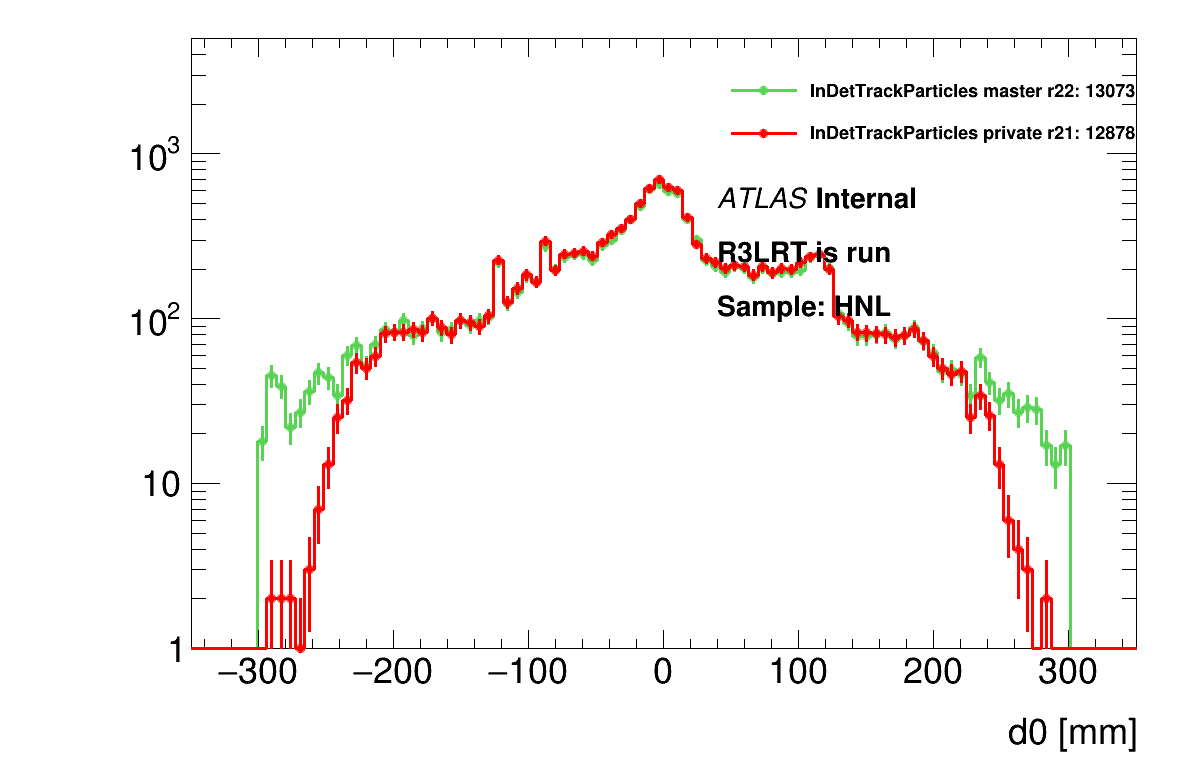

In [18]:

c2 = ROOT.TCanvas("c", "", int(1200), int(800))
c2.SetLogy()


# h_InDetTrackParticles_master.GetYaxis().SetRangeUser(1,5e5);
h_InDetTrackParticles_master.SetLineColor(8)
h_InDetTrackParticles_master.SetMarkerColor(8)
h_InDetTrackParticles_master.Draw("same hist e1")

h_InDetTrackParticles_private.SetLineColor(ROOT.kRed)
h_InDetTrackParticles_private.SetMarkerColor(ROOT.kRed)
h_InDetTrackParticles_private.Draw("same hist e1")

histograms = [h_InDetTrackParticles_master, h_InDetTrackParticles_private]

for h in histograms:
    h.SetLineWidth(3)
    h.SetXTitle("d0 [mm]")
    h.Sumw2()
    h.GetYaxis().SetRangeUser(1,5000);
    
x, y = (0.6, 0.8)
leg = ROOT.TLegend(x, 0.8, 0.91, 0.91)
leg.SetTextSize(0.025)
leg.SetBorderSize(0)
leg.SetFillColor(ROOT.kWhite)
leg.SetShadowColor(ROOT.kWhite)
for h, label in zip(histograms, ["InDetTrackParticles master r22", "InDetTrackParticles private r21"]) :
    leg.AddEntry(h, label +": "+ str(int(h.GetEntries())), "lp")
leg.Draw()

dy = .07
atlas_label(x,y-dy,'Internal')
draw_note(x, y-2*dy, f'R3LRT is run')
draw_note(x, y-3*dy, f'Sample: HNL')

c2.Draw()